<a href="https://colab.research.google.com/github/christian7777777777/Introduccion-a-la-vision-artificial/blob/main/Procesamiento_Digital_de_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tema 1:** Conceptos

---



**Práctica:** Configuración del entorno y manipulación básica de imágenes

**Objetivo:**
Familiarizar a los participantes con las herramientas básicas (OpenCV, Numpy,
Matplotlib) y realizar operaciones simples de carga y manipulación de imágenes.

**Actividades:**

1. Configurar el entorno de trabajo (Google Colab o Kaggle).

2. Cargar una imagen usando OpenCV y Pillow (PIL).

3. Mostrar la imagen usando Matplotlib.

4. Convertir la imagen a escala de grises y mostrarla.

5. Guardar la imagen modificada en el sistema.

**Resultado esperado:** Los participantes deberán ser capaces de cargar, manipular y guardar imágenes utilizando las bibliotecas mencionadas.

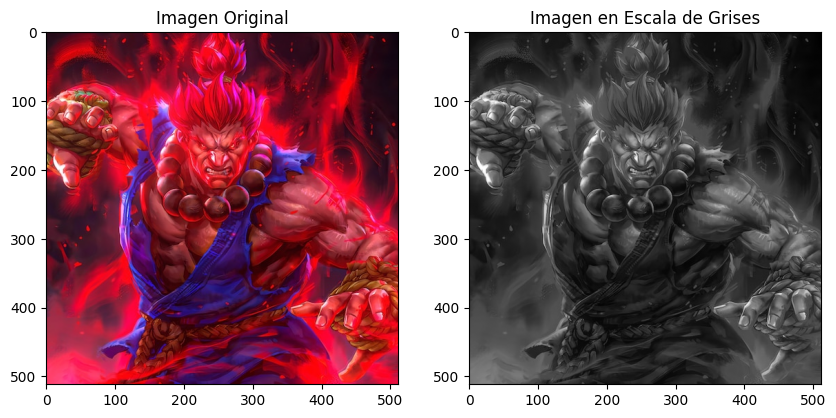

True

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Cargar una imagen usando OpenCV
image = cv2.imread('/content/descarga.jpeg')

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen original y en escala de grises usando Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # OpenCV carga en BGR, convertimos a RGB para Matplotlib

plt.subplot(1, 2, 2)
plt.title('Imagen en Escala de Grises')
plt.imshow(gray_image, cmap='gray')

plt.show()

# Guardar la imagen en escala de grises
cv2.imwrite('gray_image.jpg', gray_image)

# **Tema 2:** Digitalización de una imagen

---


**Práctica:** Efectos del muestreo y cuantización

**Objetivo:** Mostrar cómo afectan el muestreo y la cuantización a la calidad de una imagen.

**Actividades:**

1. Cargar una imagen en alta resolución.

2. Reducir la resolución de la imagen (muestreo) y observar cómo se pierde detalle.

3. Reducir el número de colores (cuantización) y observar cómo afecta a la calidad visual.

4. Comparar las imágenes original, muestreada y cuantizada.

**Resultado esperado:** Los participantes entenderán cómo el muestreo y la cuantización afectan la representación de una imagen.

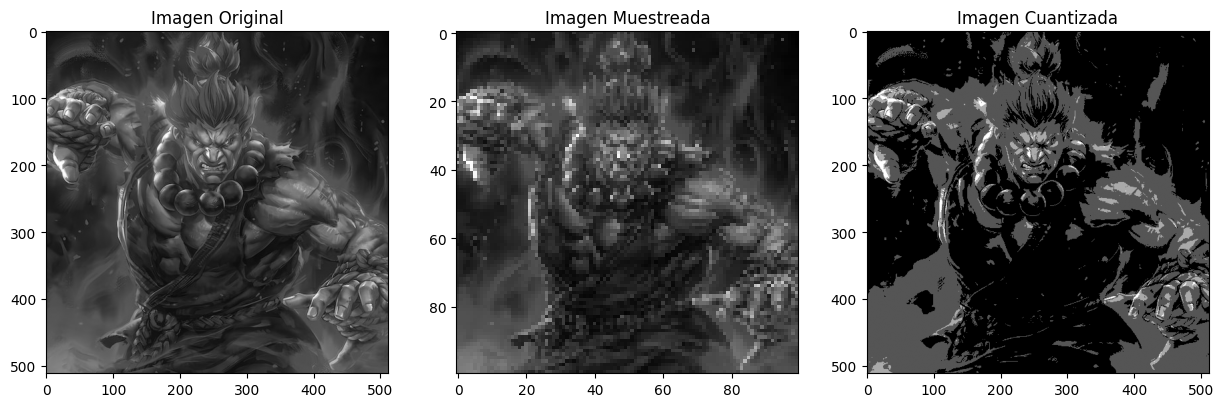

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar una imagen en alta resolución
image = cv2.imread('/content/descarga.jpeg', cv2.IMREAD_GRAYSCALE)

# Reducir la resolución (muestreo)
sampled_image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)

# Reducir el número de colores (cuantización)
quantized_image = np.floor_divide(image, 64) * 64  # Reducir a 4 niveles de intensidad

# Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Imagen Muestreada')
plt.imshow(sampled_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Imagen Cuantizada')
plt.imshow(quantized_image, cmap='gray')

plt.show()

# **Tema:** Preprocesamiento de imagen

---


**Práctica:** Operaciones básicas y umbralización

**Objetivo:** Aplicar operaciones básicas de procesamiento de imágenes y umbralización.

**Actividades:**

1. Cargar una imagen en escala de grises.

2. Aplicar operaciones aritméticas (sumar/restar un valor constante) y lógicas (AND, OR) sobre la imagen.

3. Aplicar umbralización para convertir la imagen en binaria.

4. Visualizar los resultados de cada operación.

**Resultado esperado:** Los participantes serán capaces de aplicar operaciones básicas y umbralización para modificar imágenes.

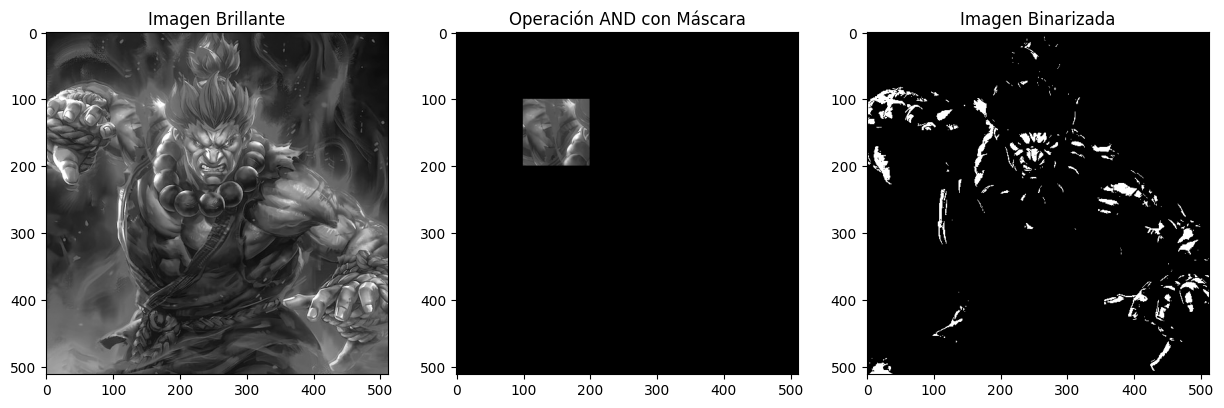

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar una imagen en escala de grises
image = cv2.imread('/content/descarga.jpeg', cv2.IMREAD_GRAYSCALE)

# Operaciones aritméticas (sumar un valor constante)
brightened_image = cv2.add(image, 50)

# Operaciones lógicas (AND con una máscara)
mask = np.zeros_like(image)
mask[100:200, 100:200] = 255
and_image = cv2.bitwise_and(image, mask)

# Umbralización (binarización)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mostrar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen Brillante')
plt.imshow(brightened_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Operación AND con Máscara')
plt.imshow(and_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Imagen Binarizada')
plt.imshow(binary_image, cmap='gray')

plt.show()

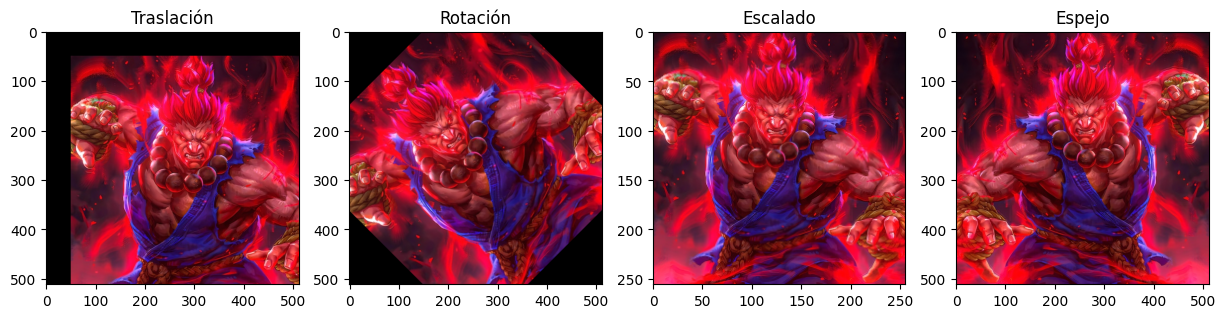

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar una imagen
image = cv2.imread('/content/descarga.jpeg')

# Obtener dimensiones de la imagen
(h, w) = image.shape[:2]

# Definir matrices de transformación
M_translation = np.float32([[1, 0, 50], [0, 1, 50]])  # Traslación
M_rotation = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1.0)  # Rotación 45 grados
M_scaling = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)  # Escalado
M_flip = cv2.flip(image, 1)  # Espejo (flip horizontal)

# Aplicar transformaciones
translated_image = cv2.warpAffine(image, M_translation, (w, h))
rotated_image = cv2.warpAffine(image, M_rotation, (w, h))

# Mostrar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Traslación')
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Rotación')
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 3)
plt.title('Escalado')
plt.imshow(cv2.cvtColor(M_scaling, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 4)
plt.title('Espejo')
plt.imshow(cv2.cvtColor(M_flip, cv2.COLOR_BGR2RGB))

plt.show()

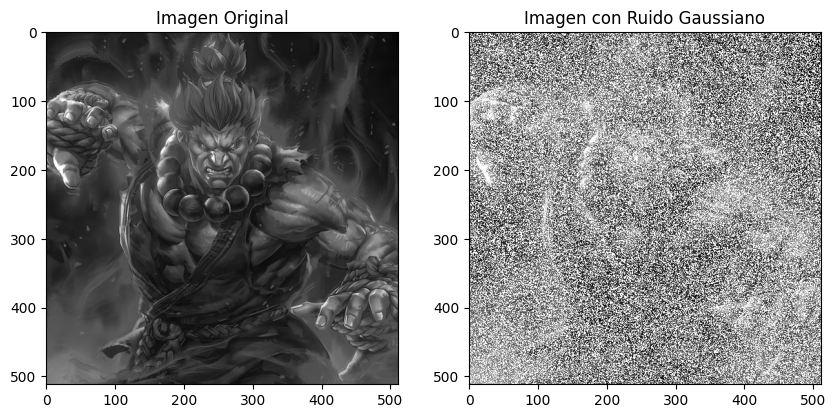

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar una imagen en escala de grises
image = cv2.imread('/content/descarga.jpeg', cv2.IMREAD_GRAYSCALE)

# Generar ruido gaussiano
mean = 0
var = 100
sigma = var ** 0.5
gaussian_noise = np.random.normal(mean, sigma, image.shape).reshape(image.shape)
noisy_image = cv2.add(image, gaussian_noise.astype(np.uint8))

# Mostrar los resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen con Ruido Gaussiano')
plt.imshow(noisy_image, cmap='gray')

plt.show()

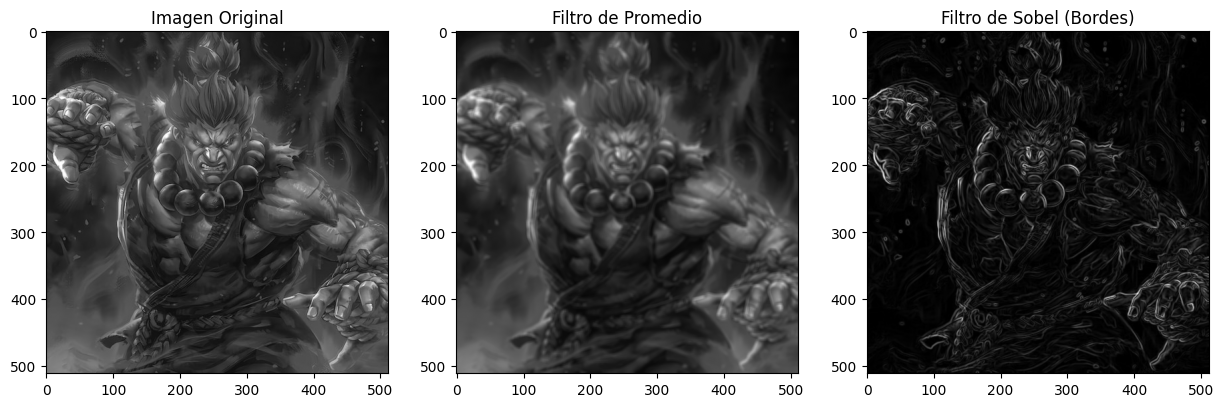

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar una imagen en escala de grises
image = cv2.imread('/content/descarga.jpeg', cv2.IMREAD_GRAYSCALE)

# Aplicar un filtro de promedio (simple)
kernel = np.ones((5, 5), np.float32) / 25
smoothed_image = cv2.filter2D(image, -1, kernel)

# Aplicar un filtro de Sobel (convolucional para detección de bordes)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Mostrar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Filtro de Promedio')
plt.imshow(smoothed_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Filtro de Sobel (Bordes)')
plt.imshow(sobel_combined, cmap='gray')

plt.show()